# Introducción a Seaborn

Lecture 7

 https://capsulasv2.soyhenry.com/scorm/046b4311-e05d-46b5-95ef-2ad1be854163/scormcontent/index.html#/lessons/HcnC6hehO52psjvsE77v0X8C5u0cP4cW

Seaborn es otra de las bibliotecas de visualización de datos en Python y se basa principalmente en Matplotlib. 

### Instalación de Seaborn

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Luego para empezar a trabajar con esta biblioteca en Python, simplemente la importas de la siguiente manera:

In [2]:
import seaborn as sns

#### CASO: Librería Insights

Librería Insights es una próspera tienda de libros con una amplia selección de títulos en diversas categorías, desde ciencia e historia hasta literatura y autoayuda. A lo largo de los años, ha acumulado datos valiosos sobre las ventas, precios, categorías de libros, calificaciones de los clientes y fechas de venta. Con el crecimiento de la competencia en el sector y los cambios en los hábitos de lectura de los consumidores, Librería Insights busca optimizar sus estrategias de inventario, marketing y ventas para mantenerse a la vanguardia del mercado.

comprender mejor el desempeño de sus libros en diferentes categorías, identificar tendencias de ventas a lo largo del tiempo, y entender cómo el precio y las calificaciones de los clientes impactan en las ventas. 

Para inicar:

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Lo importo como cosa mia

In [4]:
#Cargamos el dataset
libros = pd.read_csv('libros.csv')

#Visualizamos el dataset
libros.head() # Podriamos hacerlo con print(libros.head()), pero el instructor nos enseño de esta 
#manera en donde se visualiza mejor.

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller
0,Libro 29,Ciencia,10.93,3.4,209,2023-01-02,0
1,Libro 35,Historia,5.28,4.8,252,2023-01-09,1
2,Libro 33,Ciencia,12.90,3.2,373,2023-02-06,1
3,Libro 15,Ciencia,12.90,4.1,51,2023-02-08,1
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1


##### Creando un gráfico simple

Para ilustrar cómo Seaborn facilita la creación de visualizaciones, comenzaremos con un gráfico simple sobre el libro "Titanic" que muestra la distribución de edades entre los pasajeros del barco.

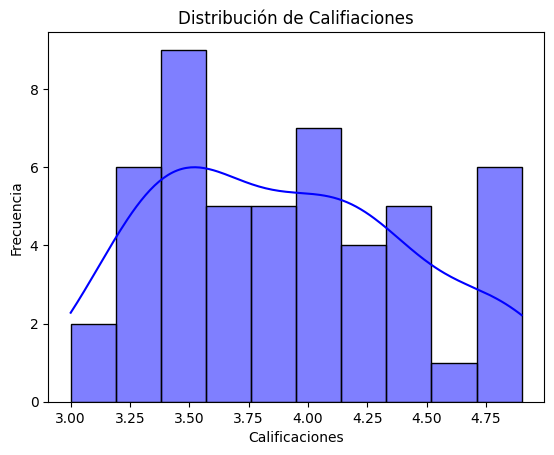

In [5]:
# Crear un gráfico de líneas sencillo
sns.histplot(data=libros, x="calificacion", bins=10, kde=True, color="blue")

# Añadir títulos y etiquetas
plt.title("Distribución de Califiaciones")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")

plt.show()

Este código genera un histograma, proporcionando una vista clara de la distribución de calificaciones de los libros en la tienda. El método sns.histplot() nos permite crear un histograma con opciones para personalizarlo, como el número de contenedores (bins) y el color.

# Visualización de relaciones en los datos

Supongamos que estamos interesados en investigar si existe una relación entre la calificación de los libros (calificación) y su precio (precio). Podemos usar sns.scatterplot() para crear un diagrama de dispersión y explorar esta relación.

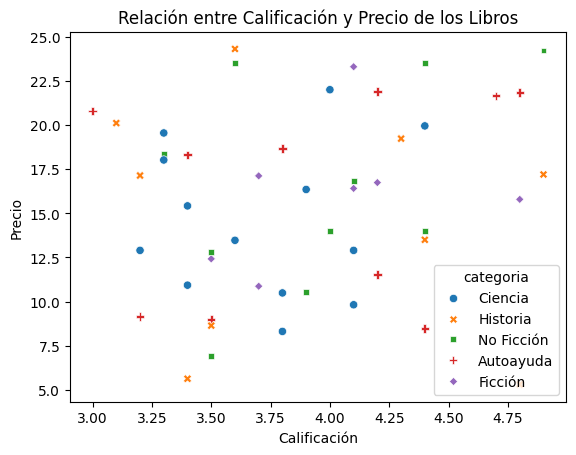

In [6]:
# Crear un diagrama de dispersión para explorar la relación entre la calificación y el precio de los libros
sns.scatterplot(data=libros, x="calificacion", y="precio", hue="categoria", style="categoria")

plt.title("Relación entre Calificación y Precio de los Libros")
plt.xlabel("Calificación")
plt.ylabel("Precio")

plt.show()


En este gráfico se utilizó el argumento hue para diferenciar los libros por su categoría, lo que añade una dimensión adicional de análisis. 

Usar el argumento style con la misma variable (categoria) permite que cada punto no solo cambie de color sino también de forma, mejorando la distinción entre categorías.

Los atributos del sns.scatterplot() son:

• data: df, array o lista de arrays. Es el conjunto de datos que contiene las variables que quieres graficar. Si es un df, buscará las variables por nombre.

• x, y: nombres de variables en data.

• hue: nombre de variable en data. Este parámetro se usa para agrupar tus puntos por una tercera variable; los puntos se colorean según los niveles de esta variable.

• style: nombre de variable en data. Similar a hue, pero en lugar de colorear los puntos de manera diferente, style cambia el marcador de los puntos según la categoría de la variable.

• size: nombre de variable en data. Este parámetro altera el tamaño de los puntos en el gráfico según los valores de la variable especificada.

• palette: método para mapear los niveles de la variable hue a colores. Puede ser el nombre de una paleta de Seaborn o de Matplotlib, una secuencia de colores en formato hexadecimal o RGB, o un diccionario que mapea los niveles del hue a colores.

• sizes: lista, diccionario o tupla. Especifica cómo se deben interpretar o mapear los tamaños con el parámetro size. Puede ser una lista directa de tamaños o un rango en forma de tupla para escalar linealmente los tamaños.

• markers: Una sola marca de Matplotlib, una secuencia de marcas, o un diccionario mapeando los niveles de la variable style a marcas.

• alpha: Nivel de transparencia de los puntos en el gráfico, entre 0 y 1.

• linewidth: Ancho de los límites de los marcadores.

• edgecolor: Color del borde de los marcadores.

#### Gráficos de líneas

Los gráficos de líneas son excelentes para visualizar cómo una variable cambia con el tiempo.

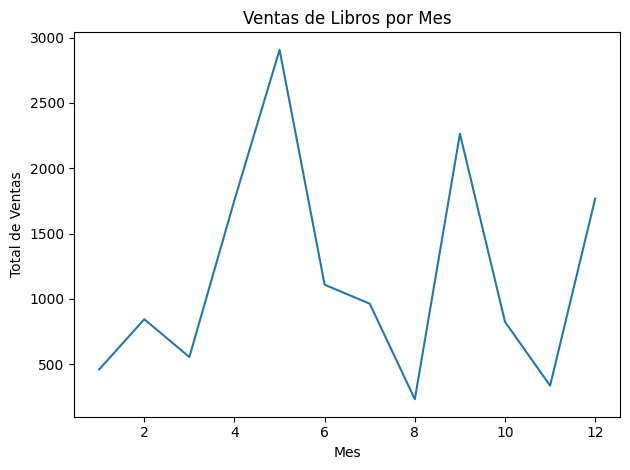

In [7]:
# Conversión de 'fecha_venta' a datetime y extracción del mes
libros['fecha_venta'] = pd.to_datetime(libros['fecha_venta'])
libros['mes'] = libros['fecha_venta'].dt.month

# Agrupación por mes y suma de las ventas
ventas_por_mes = libros.groupby('mes')['ventas'].sum().reset_index()

# Generación del gráfico de líneas
sns.lineplot(data=ventas_por_mes, x="mes", y="ventas")
plt.title("Ventas de Libros por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Ventas")
plt.tight_layout()

plt.show()


Atributos correspondientes a sns.lineplot():

• data: conjunto de datos completo. 

• x, y: ejes horizontal y vertical, respectivamente. Estos parámetros determinan las variables que queremos comparar o visualizar en el gráfico.

• hue: permite añadir una dimensión categórica al gráfico dividiendo los datos y coloreando las líneas de acuerdo con una variable categórica en el conjunto de datos. Esto puede ayudar a comparar subgrupos dentro de los datos.

• size: similar a hue, pero en lugar de cambiar el color de las líneas, cambia el grosor de las mismas según los niveles de otra variable, añadiendo otra dimensión al gráfico.

• style: también similar a hue, pero en lugar de cambiar el color o tamaño, cambia el estilo de las líneas (por ejemplo, línea sólida, punteada) según los niveles de otra variable categórica.

• palette: determina los colores que se utilizarán para diferenciar los niveles de la variable hue. Puede ser el nombre de una paleta de colores de Seaborn o Matplotlib, una lista de colores, o un diccionario que asigne colores a los niveles de la variable hue.

• sizes: un diccionario, lista, o tupla que asocia niveles de la variable especificada en size con anchos de línea.

• markers: especifica si se deben mostrar marcadores en los puntos de datos, y qué tipo de marcadores usar. Útil para resaltar los puntos de datos individuales en el gráfico de líneas.

• dashes: controla si las líneas para diferentes niveles del style o hue deben ser representadas con distintos tipos de trazos (por ejemplo, líneas sólidas vs. guiones). Puede ser un booleano o un conjunto específico de estilos de trazos.

• estimator: define la función de estimación a utilizar para resumir los datos. Puede ser una función que se aplicará a cada grupo de datos para obtener un único valor representativo (por ejemplo, mean para el promedio).

• ci: determina el intervalo de confianza a dibujar alrededor de las estimaciones centrales. Puede ser un porcentaje para indicar el intervalo de confianza basado en la desviación estándar, o None para no dibujar intervalos de confianza.

• n_boot: especifica el número de bootstraps a utilizar para calcular el intervalo de confianza. Mayor número de bootstraps puede aumentar la precisión del intervalo a costa de un mayor tiempo de cálculo.

### Introducción a FacetGrid

FacetGrid es una gran herramienta en Seaborn diseñada para crear matrices de gráficos basadas en el agrupamiento por una o más variables categóricas, esto es gracias a una clase específica de Seaborn donde se visualiza esta distribución.

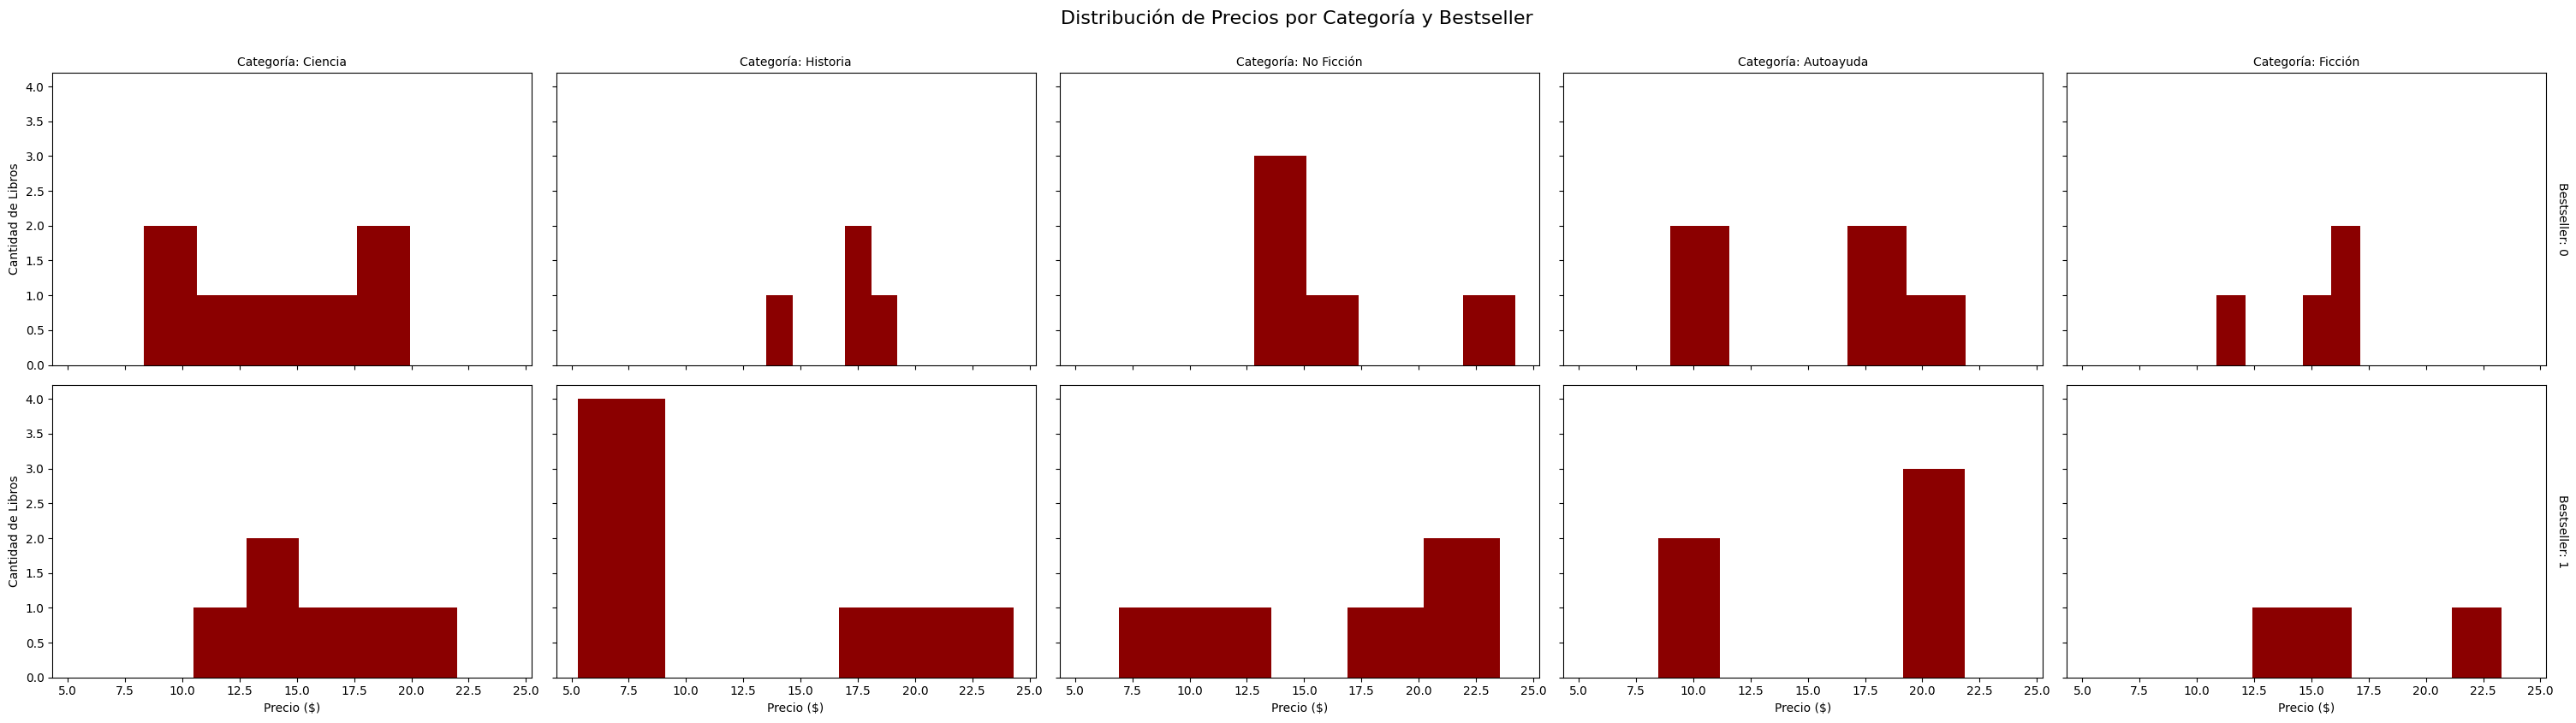

In [8]:
# Crear una instancia de FacetGrid para explorar la distribución de precios por categoría y bestseller
g = sns.FacetGrid(libros, col="categoria", row="bestseller", margin_titles=True, despine=False, height=4, aspect=1.5)
# En clomunas organiza por categorias, un grafico por cada categoria. Y en las filas por bestseller.
# margen_title=True nos mantiene los titulos fuera del margen. Se generan los graficos fuera de las margenes
# despine=False mantiene los bordes en los graficos (True elimina los bordes)
# height=4, Controla la altura de cada uno de los graficos en la cuadricula (en pulgadas)
# aspect=1.5 Controla la relacion respecto a cada grafico, entre anchura u altura

# Mapear un histograma de precios a cada subplot
g.map(plt.hist, "precio", color="darkred", bins=5) # Para cada uno de los cuadrso quiero que me pmapee y me haga histograma
# Me va a graficar un histograma sobre el precio en color rojo oscuro

# Mejorar la visualización
g.set_axis_labels("Precio ($)", "Cantidad de Libros")
g.set_titles(col_template="Categoría: {col_name}", row_template="Bestseller: {row_name}")
g.fig.suptitle('Distribución de Precios por Categoría y Bestseller', size=16, y=1.05)

plt.show()


Este código generará una serie de gráficos que muestran cómo se distribuyen los precios de los libros en diferentes categorías y dependiendo de si son bestsellers. 

Con FacetGrid, se pueden comparar fácilmente estas distribuciones y observar diferencias significativas en la estrategia de precios entre diferentes segmentos.

Atributos:

• data: es el DataFrame de pandas que contiene el conjunto de datos a visualizar. En el ejemplo, libros es el DataFrame que incluye información sobre los libros, como precio, categoría y si es un bestseller.

• col: este atributo determina qué columna del DataFrame se utilizará para crear columnas separadas en la gráfica. Cada valor único en esta columna generará una columna diferente en la cuadrícula de gráficos. En el ejemplo, se usa "categoria".

• row: similar a col, pero para crear filas separadas en la cuadrícula en lugar de columnas. Cada valor único en la columna especificada aquí generará una fila diferente. En el ejemplo, se usa "bestseller".

• margin_titles: si se establece en True, los títulos de las filas y columnas se dibujan en los márgenes fuera de los gráficos. Esto puede ayudar a ahorrar espacio y hacer que los títulos sean más legibles.

• despine: si se establece en False, mantiene los bordes en los gráficos. El valor predeterminado es True, que elimina los bordes superior y derecho para un look más limpio.

• height, aspect: height controla la altura de cada gráfico en la cuadrícula, medida en pulgadas. aspect controla la relación de aspecto de cada gráfico en la cuadrícula, que es la relación entre la anchura y la altura. En el ejemplo, se establece una altura de 4 pulgadas y una relación de aspecto de 1.5.

Métodos importantes:

• map: este método se utiliza para mapear una función de gráfico a cada subplot en la cuadrícula. Se le pasa la función de gráfico que quieres usar (por ejemplo, plt.hist para histogramas) y las columnas del DataFrame que se utilizarán como argumentos para esa función. En el ejemplo, se mapea plt.hist para la columna "precio" en cada subplot.

• set_axis_labels: permite establecer las etiquetas para los ejes X e Y en todos los gráficos de la cuadrícula. En el ejemplo, se etiqueta el eje X como "Precio ($)" y el eje Y como "Cantidad de Libros".

• set_titles: personaliza los títulos de cada gráfico en la cuadrícula. Puedes especificar plantillas para los títulos de columna y fila usando {col_name} y {row_name}, respectivamente. Esto genera títulos basados en los valores de las columnas y filas que están dividiendo la cuadrícula.

• fig.suptitle: añade un título general a toda la cuadrícula de gráficos. Este título se sitúa por encima de todos los gráficos individuales y puede ser utilizado para dar un contexto general sobre lo que representan los gráficos.

FacetGrid es altamente personalizable. Podemos ajustar el tamaño de la figura, la relación de aspecto, la paleta de colores, y más. 

Además, FacetGrid puede trabajar con diferentes tipos de gráficos, no solo histogramas. Por ejemplo, podríamos usar sns.kdeplot para una estimación de densidad de kernel (técnica no paramétrica utilizada para estimar la función de densidad de probabilidad de una variable aleatoria continua) o sns.scatterplot para gráficos de dispersión, dependiendo de lo que queramos analizar.

# Distribuciones y categorías de datos

Explorar las distribuciones y categorías de datos es fundamental para entender la naturaleza de los datos con los que trabajamos

### Histograma

Los histogramas son una de las herramientas más básicas y útiles para explorar distribuciones de datos.

sns.histplot() permite crear histogramas de manera sencilla y flexible

Imaginemos que deseamos examinar cómo se distribuyen los precios de los libros en la tienda

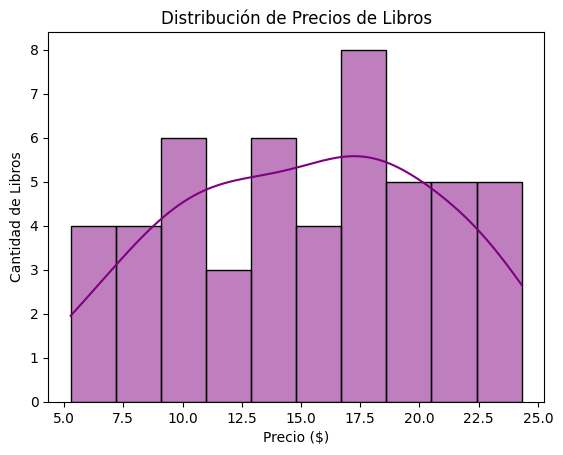

In [9]:
# Crear un histograma de los precios de los libros
sns.histplot(data=libros, x="precio", bins=10, kde=True, color="purple")
# kde=True le estamos diciendo que queremos que nos dibuje la distribucion

plt.title("Distribución de Precios de Libros")
plt.xlabel("Precio ($)")
plt.ylabel("Cantidad de Libros")

plt.show()

Atributos:

• data: el df libros contiene los datos de los libros, incluyendo sus precios.

• x: especificamos "precio" como la variable que queremos analizar.

• bins: el número de contenedores (bins) en el histograma. Aquí se usa 10 para una granularidad razonable, pero este valor puede ajustarse para explorar la distribución con diferente nivel de detalle.

• kde: establecido en True para incluir una Estimación de Densidad Kernel (KDE), que es una curva suavizada que aproxima la distribución de los datos. Ayuda a visualizar la forma general de la distribución del precio.

• color: seleccionamos "purple" para el color de los bins, pero puedes personalizar este aspecto según tus preferencias o la paleta de colores de tu presentación o marca.

### Diagramas de caja

Los diagramas de caja, o boxplots, son excelentes herramientas para visualizar la distribución de datos, resaltando la mediana, los cuartiles y valores atípicos. Son especialmente útiles para comparar diferentes categorías e identificar outliers. 

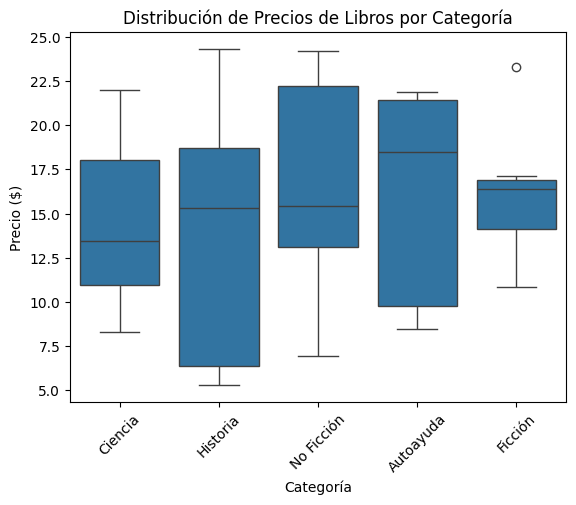

In [10]:
# Crear un diagrama de caja para comparar los precios de los libros en diferentes categorías
sns.boxplot(data = libros, x="categoria", y="precio") # showfliers=True (automatico) valores atipicos
plt.title("Distribución de Precios de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Precio ($)")
plt.xticks(rotation=45)  # Esto ayuda a mejorar la legibilidad de las etiquetas de categoría si son muchas o largas

plt.show()

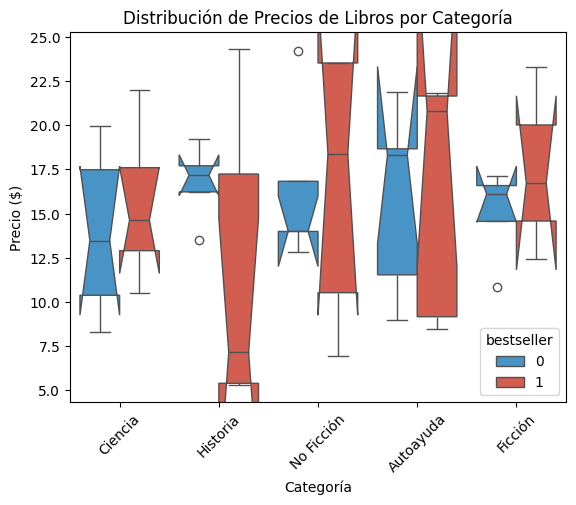

In [67]:
# Crear un diagrama de caja para comparar los precios de los libros en diferentes categorías
sns.boxplot(data = libros, x="categoria", y="precio", 
            hue='bestseller', 
            notch=True, 
            ) # showfliers=True (automatico) valores atipicos
plt.title("Distribución de Precios de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Precio ($)")
plt.xticks(rotation=45)  # Esto ayuda a mejorar la legibilidad de las etiquetas de categoría si son muchas o largas

plt.show()

"categoria" especifica que queremos comparar las categorías de libros en el eje X, y "precio" determina que el precio de los libros es la variable numérica cuya distribución estamos visualizando.
plt.title, plt.xlabel, plt.ylabel, se utilizan para añadir un título al gráfico y etiquetar los ejes, proporcionando contexto y haciendo que el gráfico sea más comprensible.

Atributos:

• data: es el conjunto de datos completo, generalmente en forma de DataFrame de pandas, que contiene las variables que queremos visualizar.

• x, y: estos parámetros especifican las variables del DataFrame que se mapearán a los ejes horizontal y vertical del gráfico. En el contexto de la tienda de libros, x podría ser "categoria" para categorizar los datos y y sería "precio" para analizar la distribución de precios dentro de esas categorías.

• hue: este parámetro agrega una dimensión categórica al gráfico, permitiendo dividir aún más los datos según otra variable y colorear los boxplots de manera diferente para cada nivel de esta variable. Por ejemplo, podrías usar "bestseller" como hue para diferenciar entre libros que son bestsellers y los que no lo son dentro de cada categoría.

• orient: Determina la orientación de los boxplots. Los valores pueden ser "v" para vertical (el valor predeterminado) o "h" para horizontal. La elección depende de cómo desees presentar los datos y la cantidad de categorías que estás comparando.

• color: Permite especificar un color único para todos los boxplots. Sin embargo, es más común usar el parámetro palette para asignar colores cuando se utiliza el parámetro hue.

• palette: Específicamente útil cuando se usa hue, este parámetro permite definir una paleta de colores para diferenciar visualmente los niveles de la variable hue.

• saturation: Este atributo controla la intensidad del color de los boxplots, con valores entre 0 y 1. Un valor más bajo produce colores más apagados.

• width: Controla el ancho de los boxplots, lo que puede ser útil para ajustar la apariencia del gráfico, especialmente cuando hay muchas categorías o niveles de hue.

• fliersize: Determina el tamaño de los marcadores utilizados para indicar valores atípicos en el gráfico. Ajustarlo puede ayudar a hacer estos puntos más visibles o menos intrusivos visualmente.

• linewidth: Este atributo ajusta el ancho de las líneas que forman los boxplots y los whiskers (las líneas que indican la variabilidad fuera de los cuartiles superior e inferior).

• notch: Cuando se establece en True, el boxplot mostrará un "notch" o estrechamiento alrededor de la mediana. Esto ofrece una visualización de la variabilidad en torno a la mediana y puede ser útil para comparar medias entre grupos.

### Gráficos de violín

Estos gráficos pueden ser particularmente útiles para visualizar y comparar la distribución de precios o calificaciones de libros entre diferentes categorías.

Los gráficos de violín ofrecen una representación más detallada que los boxplots al incluir la estimación de densidad de kernel, lo que permite ver no solo la mediana y los cuartiles, sino también dónde se concentran los datos.

Supongamos que queremos comparar la distribución de calificaciones de libros entre diferentes categorías, particularmente para ver si algunas categorías tienden a tener calificaciones más altas y cómo es la variabilidad de calificaciones dentro de cada categoría.

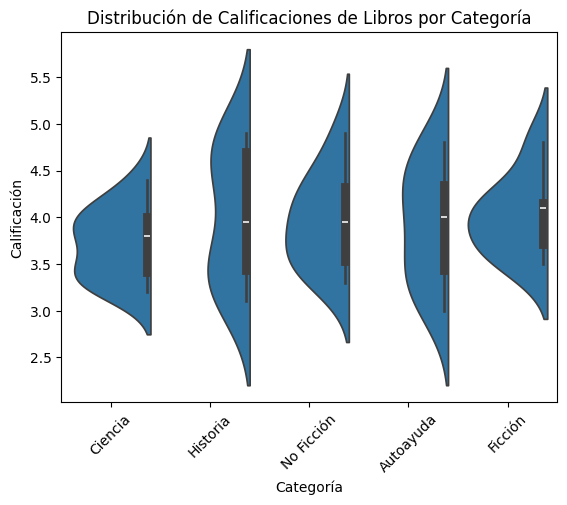

In [11]:
# Crear un gráfico de violín para comparar las calificaciones de los libros en diferentes categorías
sns.violinplot(data=libros, x="categoria", y="calificacion", split=True) #Con el split nos muestra una densidad
# hue practicamente nos agraga otro atributo 
plt.title("Distribución de Calificaciones de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Calificación")
plt.xticks(rotation=45)  # Esto ayuda a mejorar la legibilidad de las etiquetas de categoría si son muchas o largas

plt.show()

En este grafico, "categoria" nuevamente especifica que queremos comparar las categorías de libros en el eje X y "calificacion" determina que la calificación de los libros es la variable numérica cuya distribución estamos visualizando.

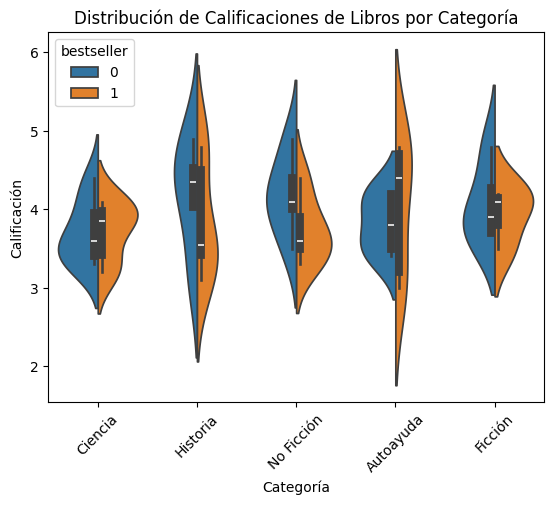

In [12]:
sns.violinplot(data=libros, x="categoria", y="calificacion", split=True, hue='bestseller') #Con el split nos muestra una densidad
# hue practicamente nos agraga otro atributo 
plt.title("Distribución de Calificaciones de Libros por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Calificación")
plt.xticks(rotation=45)  # Esto ayuda a mejorar la legibilidad de las etiquetas de categoría si son muchas o largas

plt.show()

Atributos:

• data: este es el conjunto de datos completo, generalmente proporcionado como un DataFrame de pandas, que contiene las variables a visualizar.

• x, y: estos parámetros especifican las variables en data que se mapearán a los ejes horizontal y vertical del gráfico, respectivamente. Para gráficos verticales, x suele ser categórico y y numérico.

• hue: una variable en data que determina la coloración de los componentes del gráfico en función de las categorías. Es útil para dividir los datos en niveles adicionales basados en una variable categórica, permitiendo una comparación más detallada.

• split: cuando se establece en True y se utiliza con el parámetro hue que tiene exactamente dos niveles, divide los violines en dos, mostrando cada mitad según los niveles de hue. Esto permite una comparación directa de las distribuciones entre grupos.

• scale: controla el ancho de los violines. Los valores posibles incluyen "area", "count" y "width". "area" escala cada violín para tener el mismo área, "count" escala los violines en función del número de observaciones en cada bin, y "width" usa el mismo ancho para todos los violines.

• inner: determina la representación de los datos dentro del violín. Los valores pueden ser "box", "quartile", "point", "stick" o None. Por ejemplo, "box" inserta un pequeño diagrama de caja dentro del violín, mientras que "quartile" muestra los cuartiles del dataset.

• palette: permite especificar una paleta de colores para diferenciar los niveles de la variable hue.

• bw: este parámetro controla el ancho de banda utilizado para la estimación de densidad de kernel y, por lo tanto, afecta a la suavidad del violín. Valores más bajos producen violines más angostos con menos suavización.

• cut: especifica cuánto se extienden los violines más allá de los datos más extremos. El valor predeterminado es 2, lo que permite que los violines se extiendan hasta 2 * bw en ambas direcciones fuera del rango de los datos.

• scale_hue: cuando se establece en True, cada nivel de hue tendrá su propia escala de ancho de banda. Esto puede ser útil cuando los niveles de hue tienen números muy diferentes de observaciones.

• gridsize: controla el número de puntos en la cuadrícula a lo largo del soporte del violín. Un número más alto puede mejorar la resolución de la KDE, pero puede ralentizar la generación del gráfico.

# Análisis multivariable y gráficos estadísticos

Explorar las relaciones y patrones en datos que involucran múltiples variables puede ser bastante complejo, pero gracias a las técnicas de visualización avanzadas, podemos obtener insights valiosos sobre cómo las variables interactúan entre sí. 

Vamos a profundizar en cómo los Pairplots, Heatmaps y Clustermaps pueden ser utilizados en el análisis multivariable, utilizando el caso de Librería Insights para ilustrar su aplicación.

### Pairplot

El Pairplot, o gráfico de pares, es una herramienta de visualización que muestra las relaciones entre múltiples variables numéricas en un dataset.

Pairplot crea una matriz de gráficos para visualizar las relaciones entre múltiples variables a la vez, lo que es excelente para un análisis exploratorio inicial.

En el contexto de la tienda de libros, podemos explorar las relaciones entre múltiples variables, como precios, calificaciones, número de páginas y ventas, para obtener una comprensión preliminar de cómo estas variables interactúan entre sí. Esto es particularmente útil para identificar patrones, tendencias y posibles correlaciones en los datos de la tienda de libros.

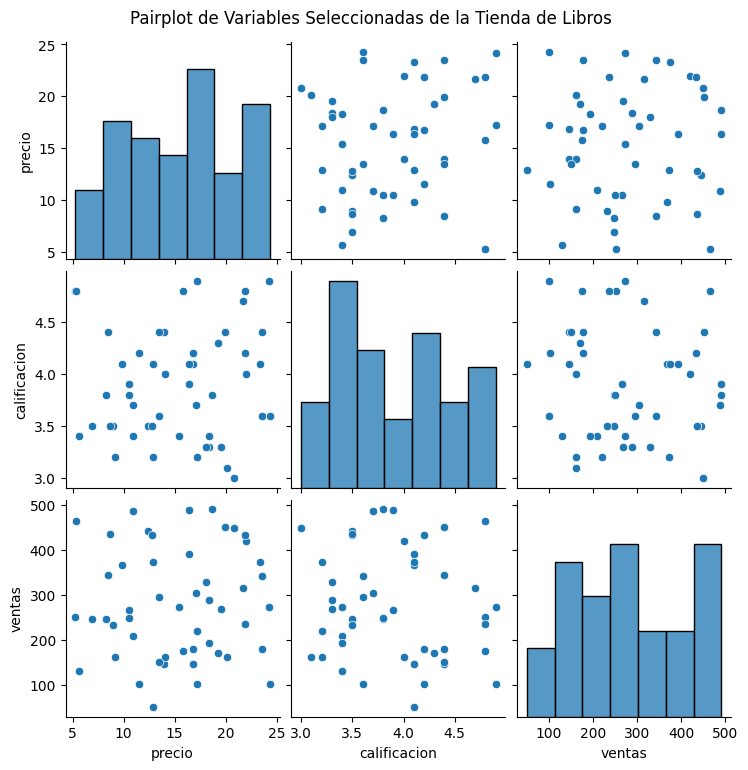

In [13]:
# Para el ejemplo, seleccionamos solo algunas variables de interés
variables_de_interes = ['precio', 'calificacion', 'ventas']

# Crear un pairplot para explorar las relaciones entre estas variables
sns.pairplot(libros[variables_de_interes])

plt.suptitle("Pairplot de Variables Seleccionadas de la Tienda de Libros", y=1.02)

plt.show()


Atributos:

• data: el primer y principal argumento. Es el DataFrame de pandas que contiene las variables que deseas explorar. Cada columna debe ser numérica o categórica; las variables numéricas se utilizan para crear los ejes de los gráficos.

• hue: una variable en data. Se utiliza para colorear los puntos en los gráficos según las categorías de esta variable, añadiendo una dimensión adicional de análisis al dividir los datos según los niveles de la variable hue.

• palette: controla los colores que se utilizarán para los diferentes niveles de la variable hue. Puede ser el nombre de una paleta de Seaborn o Matplotlib, una lista de colores, o un diccionario que asigne niveles del hue a colores.

• vars: una lista de nombres de variables a incluir en el pairplot. Esto puede ser útil si solo estás interesado en un subconjunto de las variables numéricas presentes en data.

• kind: controla el tipo de gráficos a dibujar para las relaciones bivariadas. Los valores pueden ser "scatter" (predeterminado) y "kde" para dibujar gráficos de densidad de kernel.

• diag_kind: controla el tipo de gráfico que se utiliza para mostrar la distribución univariada de cada variable. Los valores pueden ser 'auto' (predeterminado), 'hist', 'kde', o None. Establecerlo en None omite la distribución univariada.

• markers: una lista de marcadores a utilizar, o un único marcador. Esto permite personalizar la apariencia de los puntos en el gráfico. Útil cuando hue es utilizado para diferenciar entre categorías.

• height: altura (en pulgadas) de cada gráfico de la matriz. Este argumento controla el tamaño de los gráficos generados.

• aspect: aspecto de cada gráfico de la matriz, definido como el ancho dividido por la altura de cada gráfico. Esto controla la forma de los gráficos generados.

• corner: si se establece en True, solo se dibujan los gráficos en la parte inferior izquierda de la matriz, lo que puede ser útil para evitar la redundancia en la visualización.

• plot_kws, diag_kws, grid_kws: diccionarios de palabras clave adicionales. plot_kws se pasa a la función de gráfico bivariado, diag_kws a la función de gráfico univariado, y grid_kws al constructor de PairGrid para personalizar aún más el gráfico.

### Heatmap

Un Heatmap, o mapa de calor, es un gráfico estadístico que utiliza colores para representar la magnitud de los valores en una matriz. En el análisis de datos, los Heatmaps son especialmente útiles para visualizar correlaciones entre variables, donde cada celda en la matriz muestra el coeficiente de correlación entre dos variables, mostrando la fuerza de la relación entre estas.

Podemos explorar cómo diferentes aspectos de los libros, como el precio, la calificación, el número de ventas y el número de páginas, se relacionan entre sí.

Veamos el ejemplo de una Matriz de Correlación del Titanic:

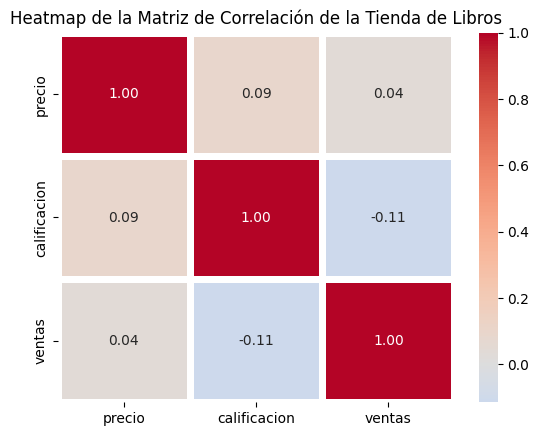

In [27]:
# Seleccionamos las variables numéricas de interés
variables_de_interes = ['precio', 'calificacion', 'ventas']

# Filtramos el DataFrame para incluir solo estas variables
libros_seleccionados = libros[variables_de_interes]

# Calculamos la matriz de correlación
corr = libros_seleccionados.corr()

# Generamos el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=5, fmt='.2f', center=0) # Con center decimos
# que nos cambien los colores cuando llegue al cero para no tener malos entendidos

plt.title("Heatmap de la Matriz de Correlación de la Tienda de Libros")
plt.show()


Seleccionamos solo un subconjunto de variables (precio, calificacion, ventas) para incluir en nuestra matriz de correlación. 
Utilizamos el método .corr() para calcular la matriz de correlación entre las variables seleccionadas. Esta matriz mide la correlación lineal entre cada par de variables, con valores que van de -1 a 1. Utilizamos sns.heatmap() para visualizar la matriz de correlación. 
Los argumentos importantes aquí incluyen annot=True para mostrar los valores de correlación en cada celda del heatmap, cmap='coolwarm' para elegir una paleta de colores que varía de azules (correlaciones negativas) a rojos (correlaciones positivas) y linewidths=.5 para definir el ancho de las líneas que separan las celdas.

Atributos:

• data: el primer y principal argumento. Debe ser un DataFrame de pandas, un array de NumPy, o una lista de listas que contiene los datos que quieres visualizar. En el contexto de una matriz de correlación, data sería el resultado del método .corr() aplicado a un DataFrame.

• annot: si se establece en True, los valores numéricos se mostrarán en las celdas del heatmap, proporcionando detalles exactos sobre los datos subyacentes.

• fmt: cuando se usa annot=True, fmt determina el formato de los números anotados. Por ejemplo, ".2f" mostraría los números flotantes con dos decimales.

• cmap: define la paleta de colores utilizada para codificar los valores numéricos. Seaborn y Matplotlib ofrecen muchas opciones, como 'coolwarm', 'viridis', 'plasma', entre otras.

• linewidths: controla el ancho de las líneas que separan las celdas del heatmap.

• linecolor: determina el color de las líneas entre las celdas. Por defecto, es blanco.

• cbar: si se establece en False, no se dibujará la barra de color que indica la escala de los colores utilizados en el heatmap.

• cbar_kws: un diccionario con argumentos para la barra de color. Permite un control más fino sobre la apariencia de la barra de color, como su orientación, etiquetas, título, etc.

• square: al establecerlo en True, hará que las celdas del heatmap sean cuadradas. Esto es útil para mejorar la estética cuando el número de variables en ambos ejes es el mismo.

• xticklabels, yticklabels: controlan las etiquetas de los ejes X e Y. Pueden ser True (las etiquetas se infieren de los datos), False (sin etiquetas), o una lista de etiquetas.

• mask: una matriz booleana del mismo tamaño que data. Las celdas True se ocultarán en el heatmap, lo cual es útil para ocultar partes de la matriz.

• center: un valor numérico que centra la paleta de colores. Por ejemplo, si tu heatmap muestra diferencias alrededor de cero, establecer center=0 puede ayudar a interpretar los datos.

• robust: si se establece en True, ajustará el rango de colores para excluir los percentiles bajos y altos, lo que puede ser útil para visualizar datos con muchos outliers.

### Clustermap

El Clustermap es una técnica avanzada que combina la visualización de heatmap con métodos de clustering jerárquico, agrupando variables o muestras que tienen patrones similares. 

Esta herramienta realiza una agrupación jerárquica tanto de las filas como de las columnas, lo que la hace ideal para identificar patrones de agrupación inherentes en los datos. Además de mostrar las correlaciones mediante un heatmap, el clustermap organiza las filas y columnas en función de la similitud de sus patrones de correlación, utilizando agrupación jerárquica. Esto puede revelar agrupaciones naturales entre las variables que podrían no ser evidentes de otra manera.

En el contexto de Librería Insights, un Clustermap podría ser utilizado para explorar cómo diferentes libros (o categorías de libros) se agrupan en función de sus características, como precios, calificaciones, y ventas. Esto podría revelar agrupaciones naturales de libros que comparten características similares, lo que podría ser útil para segmentar libros en marketing o para estrategias de recomendación.

In [15]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import scipy

In [17]:
print(scipy.__version__)

1.14.0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

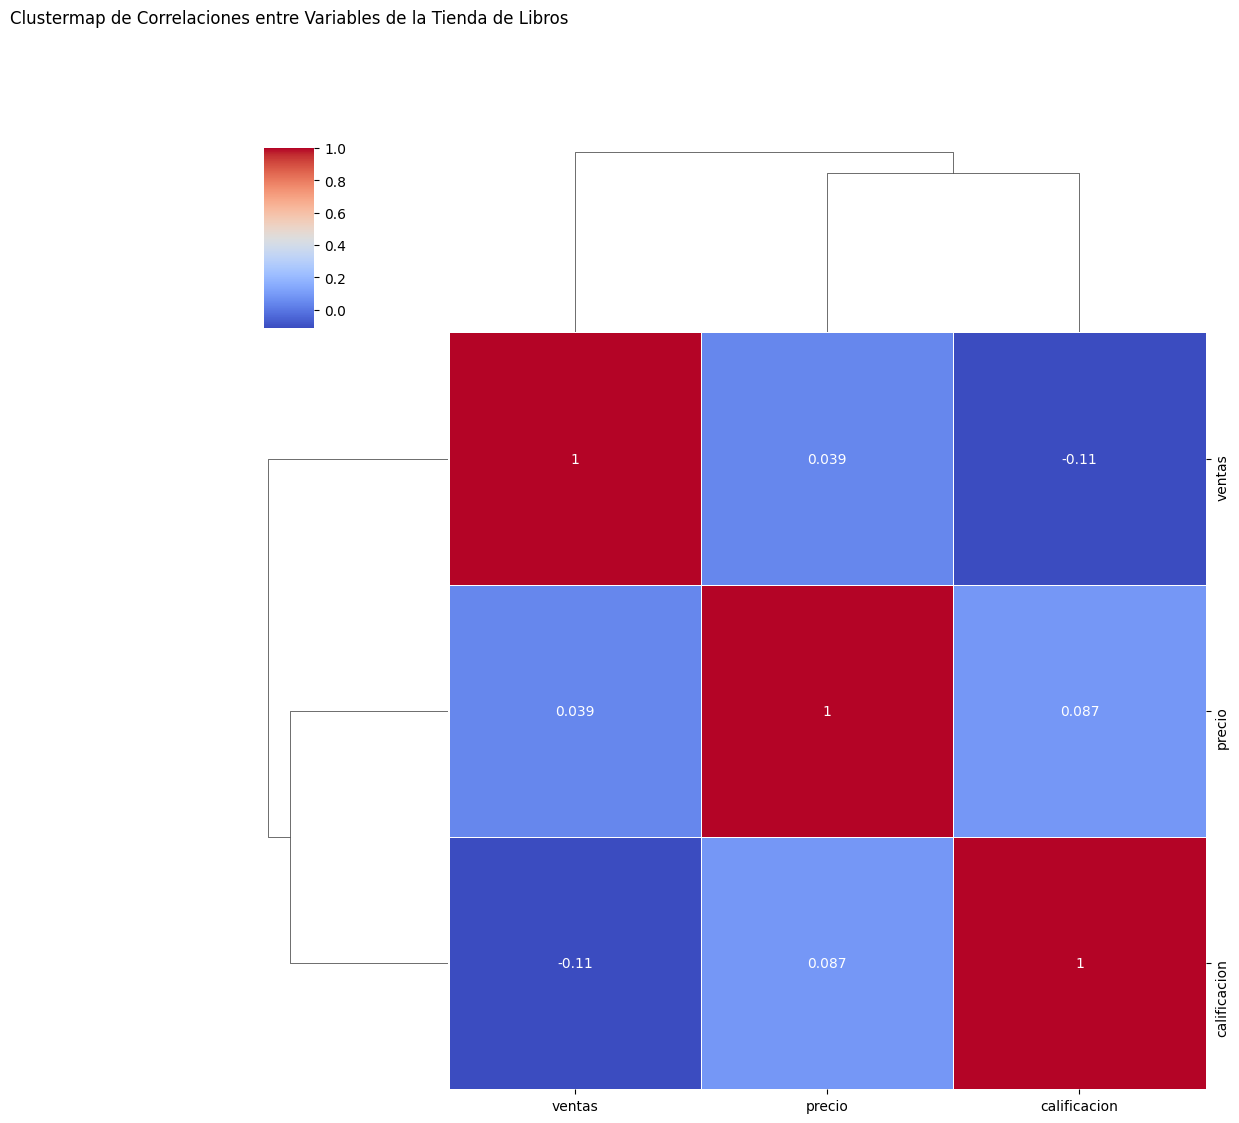

In [30]:
# Aseguramos que solo incluimos las variables de interés para el cálculo de correlación
variables_de_interes = ['precio', 'calificacion', 'ventas']
libros_seleccionados = libros[variables_de_interes]

# Calculamos la matriz de correlación
corr_matriz = libros_seleccionados.corr()

# Generamos el clustermap
sns.clustermap(corr_matriz, cmap='coolwarm', linewidths=.5, annot=True)
# Podriamos agregar center=0

plt.title("Clustermap de Correlaciones entre Variables de la Tienda de Libros", pad=90)
plt.show()


Al igual que el ejemplo anterior, seleccionamos precio, calificacion y ventas. Nuevamente utilizamos el método .corr() y luego con sns.clustermap() visualizamos la matriz de correlación.

Los argumentos importantes aquí incluyen:

cmap='coolwarm' para una representación visual intuitiva de correlaciones positivas y negativas.

linewidths=.5 para definir el ancho de las líneas que separan las celdas del heatmap.

annot=True para mostrar los valores de correlación en el heatmap, facilitando la interpretación exacta de las correlaciones.

Atributos:

• data: este es el conjunto de datos para visualizar, generalmente proporcionado como un DataFrame de pandas. Es el argumento principal y debe contener los datos que deseas explorar en formato de matriz.

• pivot_kws: un diccionario opcional de argumentos para pasar al método pivot si los datos necesitan ser pivotados para convertirlos en una matriz. Esto es útil cuando tus datos están en formato largo y necesitas reestructurarlos para el análisis.

• method: define el método de agrupación jerárquica a usar. Los valores comunes incluyen 'average', 'single', y 'complete'. Afecta cómo se calculan las distancias entre los clusters.

• metric: la métrica de distancia utilizada para la agrupación jerárquica. Ejemplos incluyen 'euclidean', 'cityblock' (manhattan), entre otros. Determina cómo se mide la similitud entre los elementos.

• z_score: normaliza los datos de la fila (1) o la columna (0) mediante la sustracción de la media y la división por la desviación estándar. Útil para comparar datos con diferentes escalas.

• standard_scale: realiza un escalado min-max de las filas (1) o las columnas (0) para que los datos estén entre 0 y 1. Esto es útil cuando quieres poner todos los datos en la misma escala.

• figsize: una tupla que indica el tamaño de la figura (ancho, altura) en pulgadas. Permite controlar el tamaño global del clustermap.

• cmap: define la paleta de colores utilizada para codificar los valores numéricos en el heatmap. Seaborn y Matplotlib ofrecen numerosas opciones.

• annot: si se establece en True, los valores numéricos se mostrarán en las celdas del heatmap, lo que proporciona un detalle adicional sobre los datos subyacentes.

• linewidths: controla el ancho de las líneas que separan las celdas del heatmap.

• linecolor: define el color de estas líneas. Por defecto, es blanco.

• cbar_kws: Un diccionario con argumentos para configurar la barra de color del heatmap. permite personalizar aspectos como la etiqueta, la ubicación y el tamaño de la barra de color.

• row_cluster, col_cluster: al establecerse en False, desactiva la agrupación jerárquica para las filas o columnas, respectivamente. Esto puede ser útil si solo estás interesado en agrupar una dimensión de los datos.

• row_linkage, col_linkage: permiten especificar matrices de enlace precalculadas para las filas o columnas, ofreciendo un control más fino sobre el proceso de agrupación.

• dendrogram_ratio: ajusta el tamaño de los dendrogramas en relación con el heatmap. Útil para mejorar la legibilidad cuando uno es más importante que el otro.

• colors_ratio: similar a dendrogram_ratio, pero para la barra de colores asociada al heatmap.

• tree_kws: un diccionario de opciones adicionales para los dendrogramas, permitiendo personalizar su apariencia.

# Visualizaciones avanzadas y personalizaciones

Las visualizaciones avanzadas y las personalizaciones juegan un papel importante en la interpretación de los datos y en la comunicación efectiva de los resultados.

Al profundizar en estos aspectos, podemos transformar visualizaciones estándar en herramientas más poderosas y expresivas que capturan la atención y facilitan la comprensión de complejidades y matices en los datos. 

Esto es especialmente relevante en el contexto de Librería Insights, donde queremos revelar insights detallados sobre ventas, preferencias de categorías, y dinámicas de precios.

Veamos cómo las paletas personalizadas, múltiples plots y anotaciones avanzadas pueden enriquecer nuestro análisis.

### Custom palettes

La elección de colores puede tener un gran impacto en la legibilidad y el atractivo visual de un gráfico. Seaborn permite personalizar fácilmente las paletas de colores para adaptarse al contexto y al significado de tus datos. Una paleta de colores bien elegida no solo hace que un gráfico sea más estético, sino que también puede ayudar a transmitir información de manera más efectiva, resaltando diferencias o similitudes importantes.

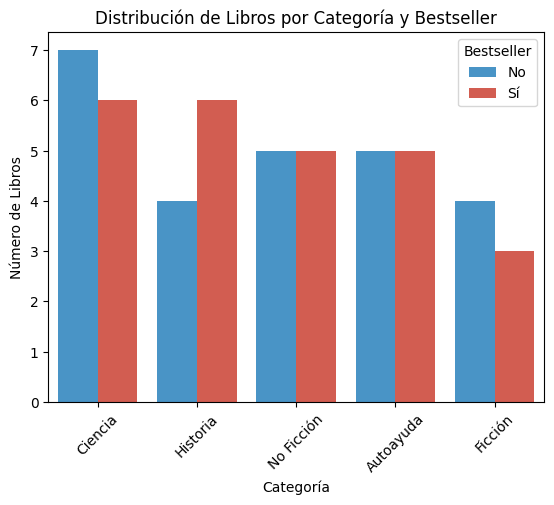

In [31]:
# Definir una paleta de colores personalizada
custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f39c12", "#9b59b6", "#95a5a6"] # Seleccionamos colores
sns.set_palette(custom_palette)

# Crear un gráfico de barras para contar libros por categoría, diferenciando bestsellers
sns.countplot(data=libros, x="categoria", hue="bestseller")

plt.title("Distribución de Libros por Categoría y Bestseller")
plt.xlabel("Categoría")
plt.ylabel("Número de Libros")
plt.xticks(rotation=45)  # Rotar las etiquetas para mejorar la legibilidad
plt.legend(title='Bestseller', labels=['No', 'Sí'])
# Con los labels le estoy diciendo que el primero (0) me lo vuelva 'No' y el segundo (1) 'Si'

plt.show()

La paleta custom_palette se define con colores específicos que hemos elegido para representar diferentes categorías de libros o el estado de bestseller. Esto mejora la claridad visual del gráfico. 

sns.set_palette(custom_palette): establece la paleta de colores personalizada como la paleta por defecto para todos los gráficos de Seaborn. 

sns.countplot: es un gráfico de barras para contar el número de libros en cada categoría.

hue: está basado en el estado de bestseller, lo que permite una comparación directa entre bestsellers y no bestsellers dentro de cada categoría.

#### Paletas de colores en Seaborn

• sns.set_palette(): esta función se utiliza para establecer la paleta de colores por defecto para todos los gráficos. Puede tomar como argumento el nombre de una paleta de Seaborn/Matplotlib, una lista de colores (en formato hexadecimal o nombres de colores de Matplotlib), o un diccionario que mapea niveles de la variable hue a colores específicos.

• palette: aunque no es un atributo en sí, palette es un argumento común en muchas funciones de trazado de Seaborn que te permite especificar la paleta de colores directamente en funciones como sns.countplot(), sns.barplot(), sns.lineplot(), etc. Acepta las mismas opciones que sns.set_palette().

#### Atributos relevantes para la personalización de paletas

• name: cuando defines una paleta personalizada utilizando sns.color_palette(), el argumento name puede especificar el nombre de una paleta de Seaborn o Matplotlib.

• n_colors: este argumento define el número de colores que quieres generar en la paleta. Es útil cuando necesitas una paleta de colores más extensa para distinguir entre múltiples categorías o niveles en tus datos.

• desat: un argumento opcional que puedes usar para ajustar la saturación de los colores en la paleta, disminuyéndola para obtener colores más apagados.

#### Funciones útiles para la creación de paletas

• sns.color_palette(): esta función permite crear paletas de colores. Puedes especificar el nombre de una paleta predefinida, una lista de colores, o crear paletas secuenciales y divergentes utilizando nombres de paletas específicos.

• sns.light_palette() y sns.dark_palette(): generan paletas secuenciales de claro a oscuro o de oscuro a claro basadas en un color específico. Son útiles para generar gradaciones de color que mantienen coherencia visual.

• sns.diverging_palette(): especialmente diseñada para datos con un punto medio claro o para comparaciones de variables que divergen en dos direcciones. Permite especificar colores para los extremos y ajustar cómo se mezclan hacia el centro.

In [32]:
# Degradado de colores
c= sns.diverging_palette(240,10) #0, 359
c

[(np.float64(0.2564697186166857),
  np.float64(0.4871591358142198),
  np.float64(0.657003695890986)),
 (np.float64(0.5306779236344225),
  np.float64(0.6706424890731881),
  np.float64(0.7746018345077771)),
 (np.float64(0.8075639431542854),
  np.float64(0.8559176719538262),
  np.float64(0.8933483924469978)),
 (np.float64(0.9316387118808909),
  np.float64(0.80428877627742),
  np.float64(0.8133889504213742)),
 (np.float64(0.8929006014071399),
  np.float64(0.5155331808211077),
  np.float64(0.5435055217093467)),
 (np.float64(0.8545371341681446),
  np.float64(0.22957019267094914),
  np.float64(0.2762321841840895))]

In [36]:
# Si queremos generar mas colores
c= sns.diverging_palette(240,10, n=10) # n es igual a la cantidad 
c

[(np.float64(0.2564697186166857),
  np.float64(0.4871591358142198),
  np.float64(0.657003695890986)),
 (np.float64(0.40701539980289403),
  np.float64(0.5878950944662025),
  np.float64(0.7215673798374594)),
 (np.float64(0.5575610809891024),
  np.float64(0.6886310531181851),
  np.float64(0.786131063783933)),
 (np.float64(0.7161612081483731),
  np.float64(0.7947565542008367),
  np.float64(0.8541490129080674)),
 (np.float64(0.8667068893345815),
  np.float64(0.8954925128528193),
  np.float64(0.918712696854541)),
 (np.float64(0.9399131852069487),
  np.float64(0.865967067839219),
  np.float64(0.8710361408679982)),
 (np.float64(0.9188508894678925),
  np.float64(0.7089677802273672),
  np.float64(0.724297837912955)),
 (np.float64(0.896661725646257),
  np.float64(0.5435687678946526),
  np.float64(0.569708790094176)),
 (np.float64(0.8755994299072009),
  np.float64(0.3865694802828008),
  np.float64(0.42297048713913266)),
 (np.float64(0.8545371341681446),
  np.float64(0.22957019267094914),
  np.float64(0.2762321841840895))]

In [44]:
# Para generar colores automativamente
cA= sns.color_palette(n_colors=20) 
cA

[(0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.1803921568627451, 0.8, 0.44313725490196076),
 (0.9529411764705882, 0.611764705882353, 0.07058823529411765),
 (0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.1803921568627451, 0.8, 0.44313725490196076),
 (0.9529411764705882, 0.611764705882353, 0.07058823529411765),
 (0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.1803921568627451, 0.8, 0.44313725490196076),
 (0.9529411764705882, 0.611764705882353, 0.07058823529411765),
 (0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882)]

In [46]:
# Pasando por parametro un color el cual va degradando
cd=sns.light_palette('red', n_colors=10)
cd

[(np.float64(0.9522635075378764),
  np.float64(0.9411073728435433),
  np.float64(0.940983659029102)),
 (np.float64(0.9575051616121487),
  np.float64(0.8377700926881738),
  np.float64(0.8376599631357103)),
 (np.float64(0.9627468156864212),
  np.float64(0.7344328125328043),
  np.float64(0.7343362672423188)),
 (np.float64(0.9681756716919175),
  np.float64(0.6274049152290289),
  np.float64(0.6273224393527347)),
 (np.float64(0.97341732576619),
  np.float64(0.5240676350736595),
  np.float64(0.523998743459343)),
 (np.float64(0.9788461817716864),
  np.float64(0.4170397377698839),
  np.float64(0.4169849155697589)),
 (np.float64(0.9840878358459588),
  np.float64(0.31370245761451443),
  np.float64(0.3136612196763674)),
 (np.float64(0.9895166918514552),
  np.float64(0.20667456031073894),
  np.float64(0.20664739178678315)),
 (np.float64(0.9947583459257276),
  np.float64(0.10333728015536947),
  np.float64(0.10332369589339163)),
 (np.float64(1.0), np.float64(0.0), np.float64(0.0))]

In [51]:
# Pasando por parametro un color el cual va degradando mas oscuro
cdr=sns.dark_palette('red', n_colors=10)
cdr

[(np.float64(0.19218232522148992),
  np.float64(0.13308584448917626),
  np.float64(0.13306098410197983)),
 (np.float64(0.28088387382462043),
  np.float64(0.11847249685899221),
  np.float64(0.11845036623980165)),
 (np.float64(0.36958542242775094),
  np.float64(0.10385914922880815),
  np.float64(0.10383974837762348)),
 (np.float64(0.4614548834809933),
  np.float64(0.08872389632611752),
  np.float64(0.08870732273465323)),
 (np.float64(0.5501564320841238),
  np.float64(0.07411054869593345),
  np.float64(0.07409670487247505)),
 (np.float64(0.6420258931373661),
  np.float64(0.058975295793242816),
  np.float64(0.058964279229504785)),
 (np.float64(0.7307274417404966),
  np.float64(0.04436194816305876),
  np.float64(0.044353661367326616)),
 (np.float64(0.822596902793739),
  np.float64(0.029226695260368127),
  np.float64(0.02922123572435635)),
 (np.float64(0.9112984513968695),
  np.float64(0.01461334763018407),
  np.float64(0.014610617862178182)),
 (np.float64(1.0), np.float64(0.0), np.float64(0.0))]

In [49]:
# Si imprimimos vemos los sodigos de los colores
print(c)
print(cA)
print(cd)
print(cdr)

[(np.float64(0.2564697186166857), np.float64(0.4871591358142198), np.float64(0.657003695890986)), (np.float64(0.40701539980289403), np.float64(0.5878950944662025), np.float64(0.7215673798374594)), (np.float64(0.5575610809891024), np.float64(0.6886310531181851), np.float64(0.786131063783933)), (np.float64(0.7161612081483731), np.float64(0.7947565542008367), np.float64(0.8541490129080674)), (np.float64(0.8667068893345815), np.float64(0.8954925128528193), np.float64(0.918712696854541)), (np.float64(0.9399131852069487), np.float64(0.865967067839219), np.float64(0.8710361408679982)), (np.float64(0.9188508894678925), np.float64(0.7089677802273672), np.float64(0.724297837912955)), (np.float64(0.896661725646257), np.float64(0.5435687678946526), np.float64(0.569708790094176)), (np.float64(0.8755994299072009), np.float64(0.3865694802828008), np.float64(0.42297048713913266)), (np.float64(0.8545371341681446), np.float64(0.22957019267094914), np.float64(0.2762321841840895))]
[(0.20392156862745098, 

### Multiple plots

La creación de múltiples plots en una sola figura (conocida como subplots en Matplotlib) o el uso de gráficos compuestos puede ser extremadamente útil para comparar diferentes segmentos de datos lado a lado o en una única vista unificada. Esto facilita la comparación directa y la identificación de patrones o anomalías en diferentes subsets del dataset.

Mostrar múltiples plots juntos puede ayudar a comparar diferentes aspectos de los datos simultáneamente.

Imaginemos que queremos comparar cómo se distribuyen los precios y las calificaciones entre los libros que son bestsellers y aquellos que no lo son. Utilizando múltiples gráficos, podemos facilitar esta comparación visual.

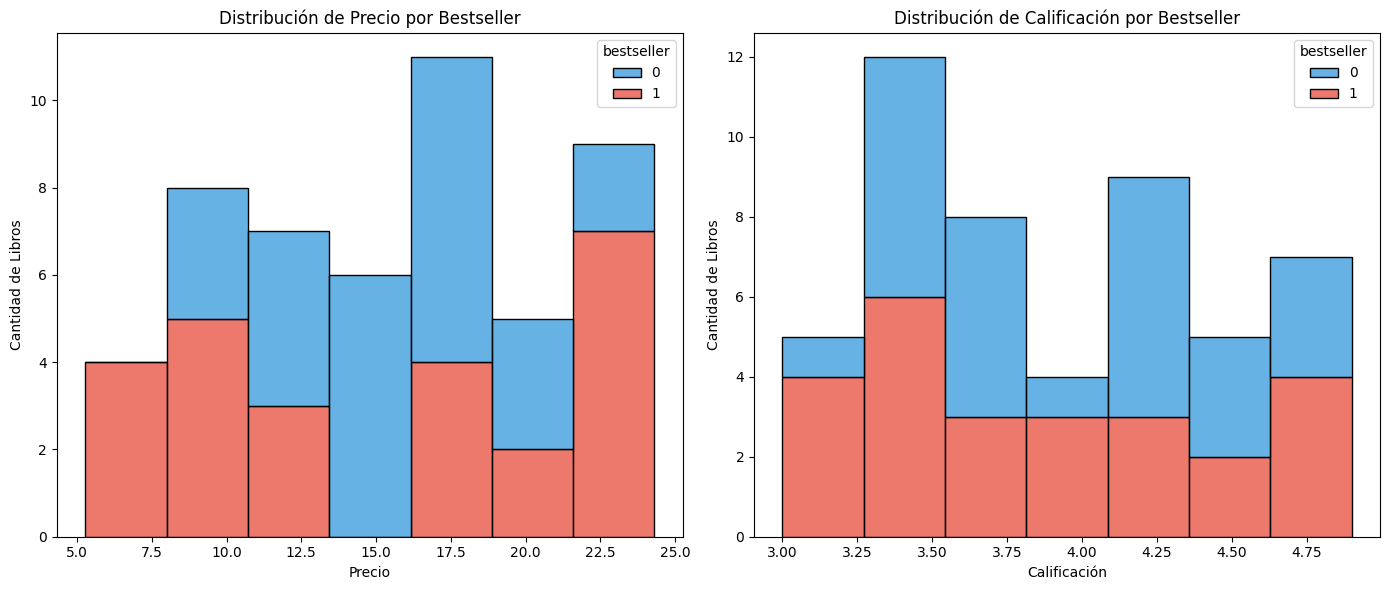

In [53]:
# Configurar un espacio de figura para múltiples plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Si queremos la misma escala sharex= True y si queremos tambien sharey=True

# primera grafica = ax[0]
# segunda grafica = ax[1]

# Plot de distribución de precios
sns.histplot(data=libros, x="precio", hue="bestseller", multiple="stack", ax=ax[0])
ax[0].set_title("Distribución de Precio por Bestseller")
ax[0].set_xlabel("Precio")
ax[0].set_ylabel("Cantidad de Libros")

# Plot de distribución de calificaciones
sns.histplot(data=libros, x="calificacion", hue="bestseller", multiple="stack", ax=ax[1])
ax[1].set_title("Distribución de Calificación por Bestseller")
ax[1].set_xlabel("Calificación")
ax[1].set_ylabel("Cantidad de Libros")

plt.tight_layout() # Ajusta las graficas
plt.show()


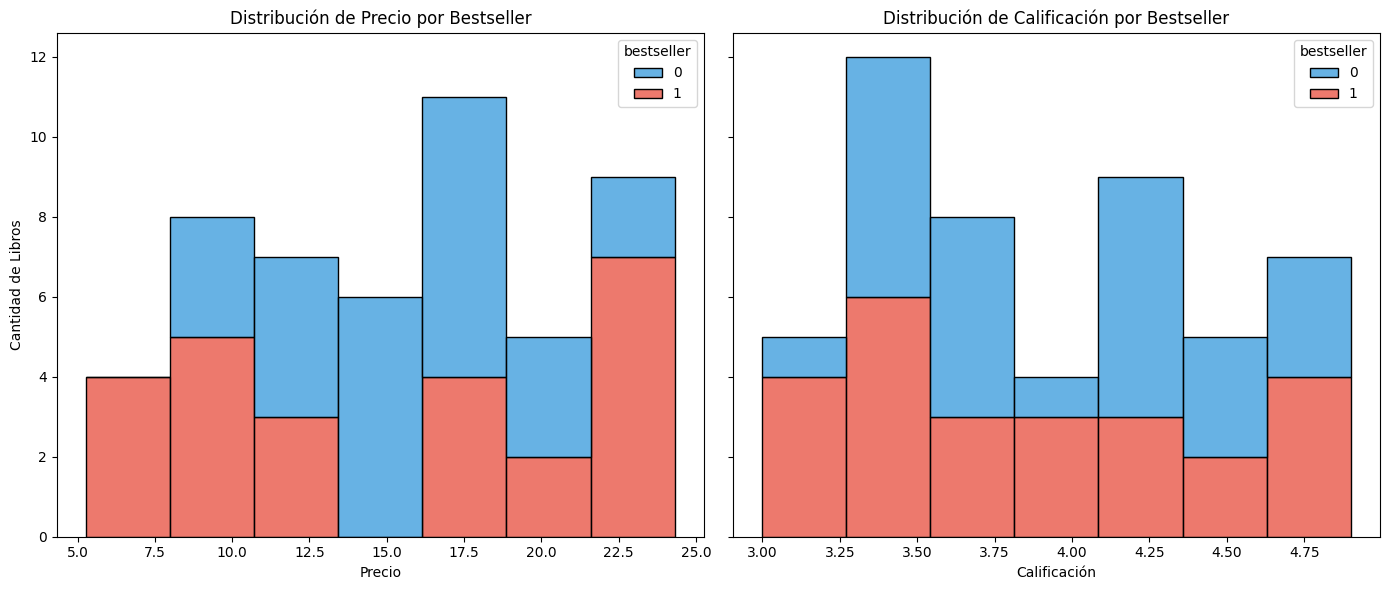

In [55]:
# Configurar un espacio de figura para múltiples plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# Si queremos la misma escala sharex= True y si queremos tambien sharey=True

# primera grafica = ax[0]
# segunda grafica = ax[1]

# Plot de distribución de precios
sns.histplot(data=libros, x="precio", hue="bestseller", multiple="stack", ax=ax[0])
ax[0].set_title("Distribución de Precio por Bestseller")
ax[0].set_xlabel("Precio")
ax[0].set_ylabel("Cantidad de Libros")

# Plot de distribución de calificaciones
sns.histplot(data=libros, x="calificacion", hue="bestseller", multiple="stack", ax=ax[1])
ax[1].set_title("Distribución de Calificación por Bestseller")
ax[1].set_xlabel("Calificación")
ax[1].set_ylabel("Cantidad de Libros")

plt.tight_layout() # Ajusta las graficas
plt.show()


Descripción del ejemplo:

Configuración de la figura: utilizamos plt.subplots() para crear un espacio que contendrá dos gráficos, lado a lado, con un tamaño total de figura de 14x6 pulgadas.

Distribución de precios: el primer gráfico (ax[0]) visualiza la distribución de precios, diferenciando entre bestsellers y no bestsellers usando colores diferentes para cada grupo.

Distribución de calificaciones: el segundo gráfico (ax[1]) muestra la distribución de calificaciones de los libros, también diferenciados por el estado de bestseller.

Títulos y etiquetas: cada gráfico incluye un título y etiquetas para los ejes X e Y, mejorando la claridad y la interpretación de los datos visualizados.

#### Tamaño de la figura

• Ajuste adecuado: el tamaño de la figura debe ser lo suficientemente grande para acomodar todos los subplots sin que estos se solapen o se vean apretados. Usa el argumento figsize en plt.subplots() para ajustar el tamaño total de la figura.

• Proporción: considera la proporción entre el ancho y la altura de la figura para asegurar que los gráficos individuales dentro de la figura mantengan una buena relación de aspecto.

#### Legibilidad

• Tamaño de fuente: asegúrate de que el tamaño de la fuente para los títulos, etiquetas de ejes y leyendas sea lo suficientemente grande para ser fácilmente legible, pero no tan grande como para abrumar el gráfico.

• Rotación de etiquetas: las etiquetas en los ejes, especialmente en el eje x, pueden necesitar ser rotadas (usando plt.xticks(rotation=angle) o el argumento rotation en las funciones de Seaborn) para evitar que se solapen.

• Coherencia estética

• Paletas de colores: utiliza paletas de colores coherentes a través de todos los subplots para mantener una apariencia unificada. Seaborn facilita esto al aplicar automáticamente su paleta de colores actual a todos los plots.

• Estilo de los Plots: intenta mantener un estilo consistente en todos los subplots, incluyendo el uso de tipos de marcadores, líneas y otros elementos gráficos.

#### Distribución y alineación

• Espaciado adecuado: utiliza plt.tight_layout() o ajusta manualmente los márgenes y espacios entre los subplots con plt.subplots_adjust() para evitar que los elementos de un plot se superpongan sobre otro.

• Alineación de ejes: en algunos casos, es útil asegurarse de que los ejes correspondientes en diferentes subplots estén alineados, especialmente si estás comparando las mismas variables. Puedes usar funciones como sharex=True o sharey=True en plt.subplots().

### Anotaciones avanzadas

Las anotaciones avanzadas permiten agregar texto explicativo, flechas, o formas a gráficos para destacar puntos de datos específicos, tendencias, o para explicar particularidades en los datos. Estas herramientas de anotación pueden ser cruciales para guiar al espectador a través de los hallazgos clave de la visualización.

Imaginemos que deseamos visualizar cómo el precio y la calificación de los libros se relacionan entre sí y queremos destacar un libro que, a pesar de tener un precio alto, ha logrado ser un bestseller.

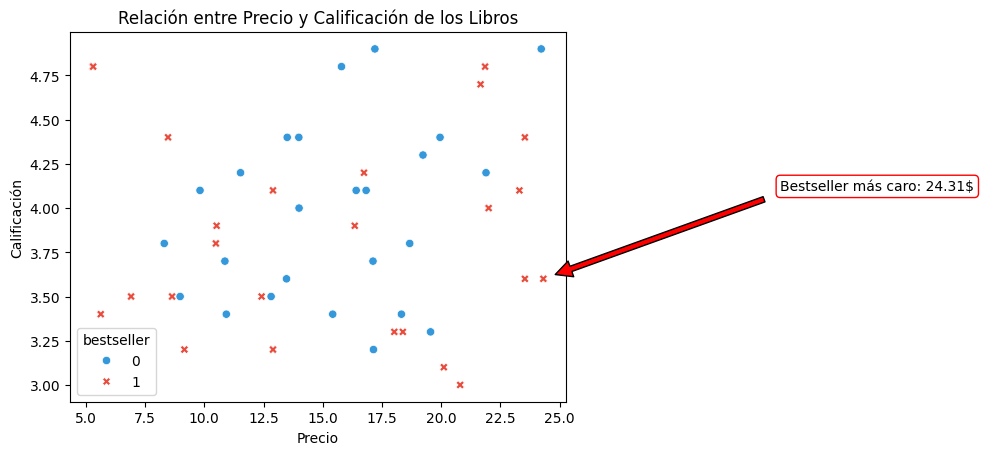

In [61]:
# Crear un gráfico de dispersión para visualizar la relación entre precio y calificación
sns.scatterplot(data=libros, x="precio", y="calificacion", hue="bestseller", style="bestseller")

# Identificamos el libro más caro que es bestseller
libro_destacado = libros[libros['bestseller'] == 1].sort_values(by="precio", ascending=False).iloc[0]

# Añadir anotaciones para resaltar este libro
plt.annotate(
    f"Bestseller más caro: {libro_destacado['precio']}$",
    xy=(libro_destacado['precio'], libro_destacado['calificacion']),
    xytext=(libro_destacado['precio'] + 10, libro_destacado['calificacion'] + 0.5),
    arrowprops=dict(facecolor='red', shrink=0.05),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white")
)

plt.title("Relación entre Precio y Calificación de los Libros")
plt.xlabel("Precio")
plt.ylabel("Calificación")
plt.show()

En el ejemplo:

Gráfico de dispersión: usamos sns.scatterplot() para crear un gráfico de dispersión que muestre la relación entre el precio y la calificación de los libros, usando diferentes colores y estilos para marcar los bestsellers.

Anotación de datos específicos: seleccionamos el libro más caro que es un bestseller y usamos plt.annotate() para añadir una anotación que destaque este libro en particular. La anotación incluye el precio del libro y utiliza una flecha roja para señalar su ubicación en el gráfico.

Personalización de la anotación: utilizamos xy para especificar la ubicación del punto que estamos anotando, xytext para la ubicación del texto de la anotación, arrowprops para personalizar la apariencia de la flecha, y bbox para añadir un recuadro alrededor del texto de la anotación, mejorando su visibilidad.

Ejercicio en el Video (pasos)

<Axes: xlabel='precio', ylabel='calificacion'>

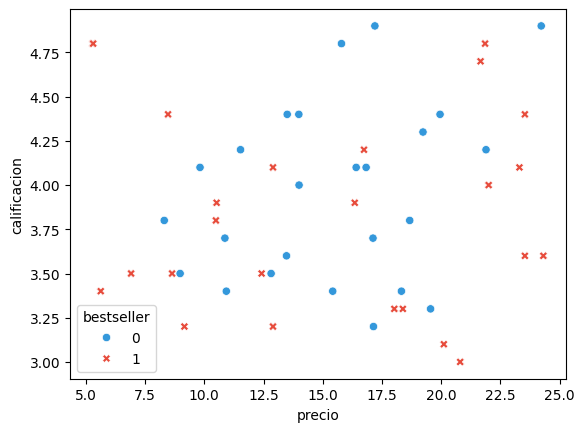

In [56]:
# Crear un gráfico de dispersión para visualizar la relación entre precio y calificación
sns.scatterplot(data=libros, x="precio", y="calificacion", hue="bestseller", style="bestseller")

In [58]:
mask=libros['bestseller']==1
filtro=libros[mask].sort_values(by='precio', ascending=False)
filtro

,titulo,categoria,precio,calificacion,ventas,fecha_venta,bestseller,mes
46,Libro 26,Historia,24.31,3.6,102,2023-12-12,1,12
30,Libro 40,No Ficción,23.53,3.6,343,2023-07-27,1,7
43,Libro 16,No Ficción,23.53,4.4,179,2023-12-04,1,12
25,Libro 42,Ficción,23.30,4.1,374,2023-06-01,1,6
4,Libro 43,Ciencia,22.00,4.0,421,2023-02-23,1,2
41,Libro 13,Autoayuda,21.85,4.8,236,2023-11-04,1,11
47,Libro 4,Autoayuda,21.66,4.7,317,2023-12-15,1,12
21,Libro 38,Autoayuda,20.80,3.0,450,2023-05-27,1,5
45,Libro 8,Historia,20.11,3.1,162,2023-12-12,1,12
6,Libro 47,No Ficción,18.38,3.3,289,2023-03-16,1,3


In [59]:
# Para traer la informacion del primer valor usamos iloc[0]
filtro.iloc[0]

titulo                     Libro 26
categoria                  Historia
precio                        24.31
calificacion                    3.6
ventas                          102
fecha_venta     2023-12-12 00:00:00
bestseller                        1
mes                              12
Name: 46, dtype: object

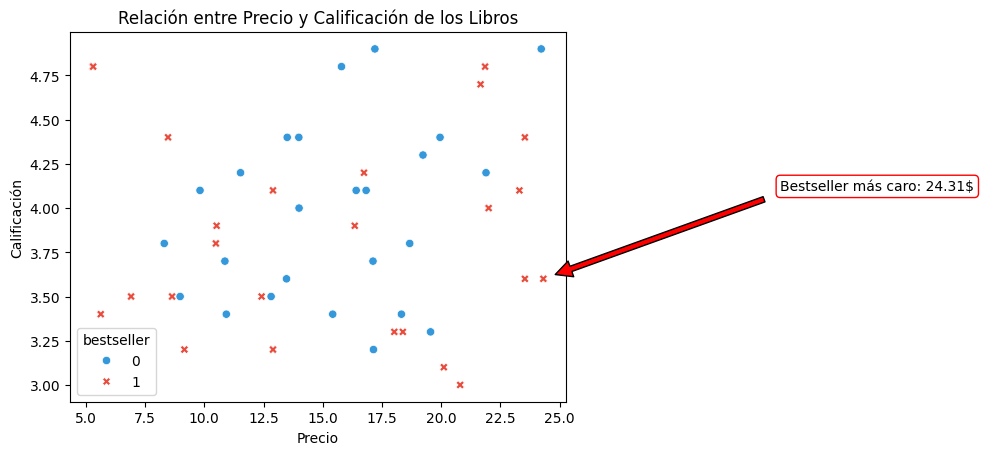

In [62]:
# Lo macheteo (realizo) por mi cuenta con los pasos anteriores de la explicacion
# Crear un gráfico de dispersión para visualizar la relación entre precio y calificación
sns.scatterplot(data=libros, x="precio", y="calificacion", hue="bestseller", style="bestseller")

libro_destacado=filtro.iloc[0]

# Añadir anotaciones para resaltar este libro
plt.annotate(
    f"Bestseller más caro: {libro_destacado['precio']}$",
    xy=(libro_destacado['precio'], libro_destacado['calificacion']),
    xytext=(libro_destacado['precio'] + 10, libro_destacado['calificacion'] + 0.5),
    arrowprops=dict(facecolor='red', shrink=0.05),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white")
)

plt.title("Relación entre Precio y Calificación de los Libros")
plt.xlabel("Precio")
plt.ylabel("Calificación")
plt.show()

### Paletas de colores en Seaborn

• sns.set_palette(): esta función se utiliza para establecer la paleta de colores por defecto para todos los gráficos. Puede tomar como argumento el nombre de una paleta de Seaborn/Matplotlib, una lista de colores (en formato hexadecimal o nombres de colores de Matplotlib), o un diccionario que mapea niveles de la variable hue a colores específicos.

• palette: aunque no es un atributo en sí, palette es un argumento común en muchas funciones de trazado de Seaborn que te permite especificar la paleta de colores directamente en funciones como sns.countplot(), sns.barplot(), sns.lineplot(), etc. Acepta las mismas opciones que sns.set_palette().

### Atributos relevantes para la personalización de paletas

• name: cuando defines una paleta personalizada utilizando sns.color_palette(), el argumento name puede especificar el nombre de una paleta de Seaborn o Matplotlib.

• n_colors: este argumento define el número de colores que quieres generar en la paleta. Es útil cuando necesitas una paleta de colores más extensa para distinguir entre múltiples categorías o niveles en tus datos.

• desat: un argumento opcional que puedes usar para ajustar la saturación de los colores en la paleta, disminuyéndola para obtener colores más apagados.

### Funciones útiles para la creación de paletas

• sns.color_palette(): esta función permite crear paletas de colores. Puedes especificar el nombre de una paleta predefinida, una lista de colores, o crear paletas secuenciales y divergentes utilizando nombres de paletas específicos.

• sns.light_palette() y sns.dark_palette(): generan paletas secuenciales de claro a oscuro o de oscuro a claro basadas en un color específico. Son útiles para generar gradaciones de color que mantienen coherencia visual.

• sns.diverging_palette(): especialmente diseñada para datos con un punto medio claro o para comparaciones de variables que divergen en dos direcciones. Permite especificar colores para los extremos y ajustar cómo se mezclan hacia el centro.